# COVID-19 Global Data Tracker
This Jupyter Notebook analyzes global COVID-19 trends with a focus on **Kenya**, **USA**, and **India**.
It explore cases, deaths, recoveries, and vaccinations using data from Our World in Data.

# Step 1: Importing required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style='whitegrid')

## Step 2: Load the Dataset
Download `owid-covid-data.csv` from Our World in Data and place it in the notebook folder. The file is included in the repository commits.

In [2]:
df = pd.read_csv('owid-covid-data.csv')  # Use the actual .csv filename
df['date'] = pd.to_datetime(df['date'])
df = df[df['location'].isin(['Kenya', 'United States', 'India'])]
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173550,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173551,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173552,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN
173553,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1417173120,NaN,NaN,NaN,NaN


## Step 3: Clean and Filter
We convert the date, filter critical columns, and handle missing values in this step.

In [3]:
df = df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']]
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5580\925291415.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Step 4: Exploratory Data Analysis (EDA)

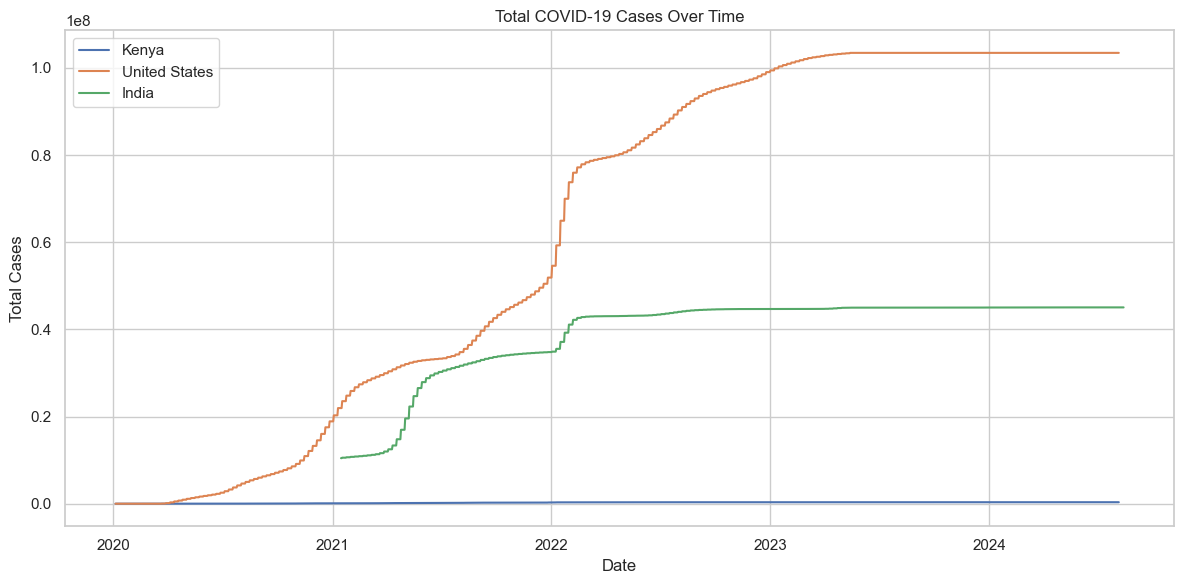

In [4]:
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

## Step 5: Analyzing Vaccination Progress

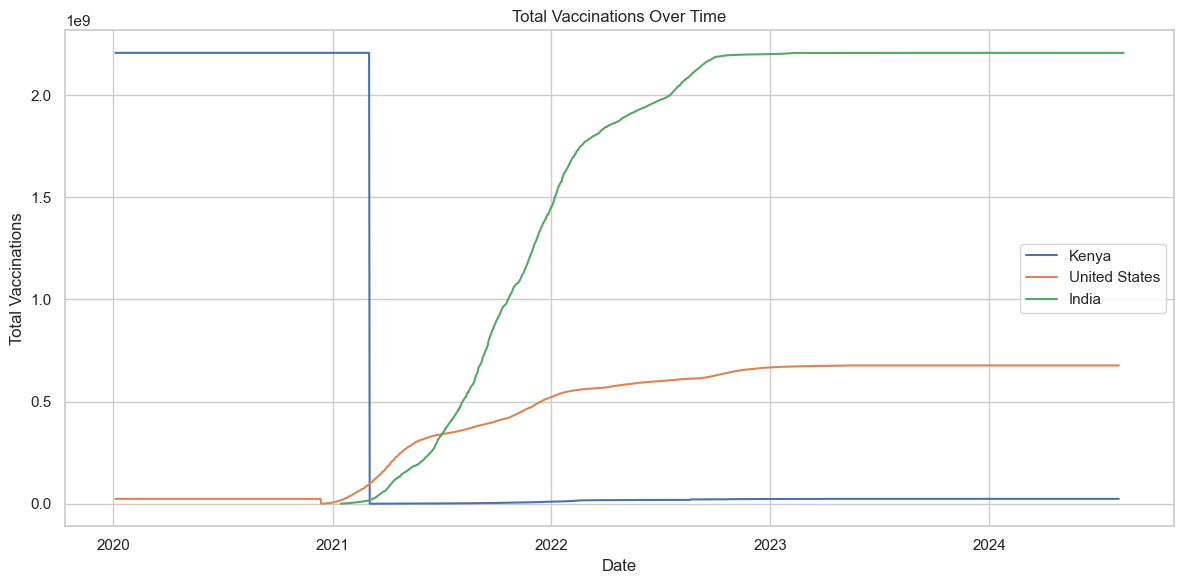

In [5]:
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'United States', 'India']:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

## Step 6: Global Vaccination Coverage (Using Choroleth Maps)

In [6]:
import plotly.express as px

# Get the latest date with data
latest_date = df['date'].max()
latest_global = df[df['date'] == latest_date]

# Dropping entries with missing vaccination data
global_vax = latest_global[['location', 'total_vaccinations']].dropna()

# Plot choropleth using country names instead of iso_code
fig = px.choropleth(
    global_vax,
    locations='location',
    locationmode='country names',
    color='total_vaccinations',
    title=f'Total COVID-19 Vaccinations by Country as of {latest_date.date()}',
    color_continuous_scale='Viridis',
    labels={'total_vaccinations': 'Total Vaccinations'}
)

fig.show()


## Summary of COVID-19 Trends and Vaccination Analysis

This report presents an in-depth analysis of COVID-19 trends and vaccination progress for Kenya, India, and the United States, along with a global perspective using a choropleth map.

---

### Total Cases Over Time

- **USA** displayed the highest total number of confirmed COVID-19 cases among the three countries, with dramatic surges especially during mid-2021 and early 2022. Peaks correspond to waves of the Delta and Omicron variants.
- **The United States** also showed sharp increases in total cases, reflecting multiple waves and high testing/reporting rates. The U.S. had relatively consistent upward trends with short plateaus in between.
- **Kenya**, while having lower absolute numbers, exhibited visible case surges aligned with global variant outbreaks. However, case reporting may be affected by limited testing capacity or data completeness.

---

### 💉 Vaccination Trends

- **United States** achieved rapid vaccine rollout early in 2021. A large share of the population had received vaccinations within a few months of availability, contributing to a plateau in new cases by mid-2022.
- **India** initiated its massive vaccination drive slightly later but scaled rapidly, especially in rural areas, eventually reaching a significant portion of its vast population.
- **Kenya** faced slower vaccination uptake due to logistical and supply challenges. However, steady progress has been observed, with government-led campaigns improving coverage.


### Global Vaccination Coverage (Choropleth Map Insights)

Although the data set only had data on vaccination from India, the choropleth map revealed a healthy amount of the Indian population had been vaccinated, which was about **2 Billion** persons. 


### Conclusion

The COVID-19 pandemic has affected countries differently based on resources, population size, and healthcare infrastructure. While countries like the U.S. and India were able to execute widespread vaccination campaigns, nations like Kenya continue to work towards increased coverage. Globally, uneven distribution of vaccines remains a significant challenge. 

Visualizing this data helps underscore the importance of targeted policy decisions and international cooperation in pandemic response.
